In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import tensorflow as tf

In [ ]:
# Loading the dataset
data = np.genfromtxt('/Fertility_Diagnosis.txt', delimiter=',')
X = data[:, :-1]
y = data[:, -1].reshape(-1, 1)

# Splitting the dataset into train and test (75% train, 25% test)
split_idx = int(0.75 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [ ]:
# Defining the input and output layer sizes
input_size = X_train.shape[1]
output_size = 1
training_errors = []
testing_errors = []
error_tolerance = 0.05

In [ ]:
# Training the neural network
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x): # Derivative of sigmoid function
    return x * (1 - x)

alpha = 0.001 # Learning Rate

for hidden_neurons in range(1, 10):
    # Random weights initialization
    np.random.seed(42)
    synapse_0 = 2 * np.random.random((input_size, hidden_neurons)) - 1
    synapse_1 = 2 * np.random.random((hidden_neurons, output_size)) - 1

    for i in range(1, 1000001):
        # Feedforward
        layer_0 = X_train
        layer_1 = sigmoid(np.dot(layer_0, synapse_0))
        layer_2 = sigmoid(np.dot(layer_1, synapse_1))

        # Cost and error
        layer_2_error = y_train - layer_2
        mse = np.mean(np.square(layer_2_error))

        if i % 100000 == 0 or mse < error_tolerance:
            print(f"Hidden Neurons: {hidden_neurons}, Iter: {i}, Training MSE: {mse:.6f}")

        if mse < error_tolerance:
            print(f"Training converged at iteration {i} for {hidden_neurons} neurons.")
            break

        # Backpropagation
        layer_2_delta = layer_2_error * sigmoid_derivative(layer_2)
        layer_1_error = layer_2_delta.dot(synapse_1.T)
        layer_1_delta = layer_1_error * sigmoid_derivative(layer_1)

        # Weights Update
        synapse_1 += layer_1.T.dot(layer_2_delta) * alpha
        synapse_0 += layer_0.T.dot(layer_1_delta) * alpha

    # Evaluating on Training Data
    layer_1_train = sigmoid(np.dot(X_train, synapse_0))
    layer_2_train = sigmoid(np.dot(layer_1_train, synapse_1))
    train_mse = mean_squared_error(y_train, layer_2_train)
    training_errors.append(train_mse)
    print(f"Final Training MSE for {hidden_neurons} neurons: {train_mse:.6f}")

    #Evaluating on Test Data
    layer_1_test = sigmoid(np.dot(X_test, synapse_0))
    layer_2_test = sigmoid(np.dot(layer_1_test, synapse_1))
    test_mse = mean_squared_error(y_test, layer_2_test)
    testing_errors.append(test_mse)
    print(f"Final Testing MSE for {hidden_neurons} neurons: {test_mse:.6f}")

Hidden Neurons: 1, Iter: 100000, Training MSE: 0.086423
Hidden Neurons: 1, Iter: 200000, Training MSE: 0.083058
Hidden Neurons: 1, Iter: 300000, Training MSE: 0.081305
Hidden Neurons: 1, Iter: 400000, Training MSE: 0.080090
Hidden Neurons: 1, Iter: 500000, Training MSE: 0.079154
Hidden Neurons: 1, Iter: 600000, Training MSE: 0.078402
Hidden Neurons: 1, Iter: 700000, Training MSE: 0.077784
Hidden Neurons: 1, Iter: 800000, Training MSE: 0.077269
Hidden Neurons: 1, Iter: 900000, Training MSE: 0.076833
Hidden Neurons: 1, Iter: 1000000, Training MSE: 0.076461
Final Training MSE for 1 neurons: 0.076461
Final Testing MSE for 1 neurons: 0.105876
Hidden Neurons: 2, Iter: 100000, Training MSE: 0.083758
Hidden Neurons: 2, Iter: 200000, Training MSE: 0.078997
Hidden Neurons: 2, Iter: 300000, Training MSE: 0.076333
Hidden Neurons: 2, Iter: 400000, Training MSE: 0.074502
Hidden Neurons: 2, Iter: 500000, Training MSE: 0.073137
Hidden Neurons: 2, Iter: 600000, Training MSE: 0.072074
Hidden Neurons: 2,

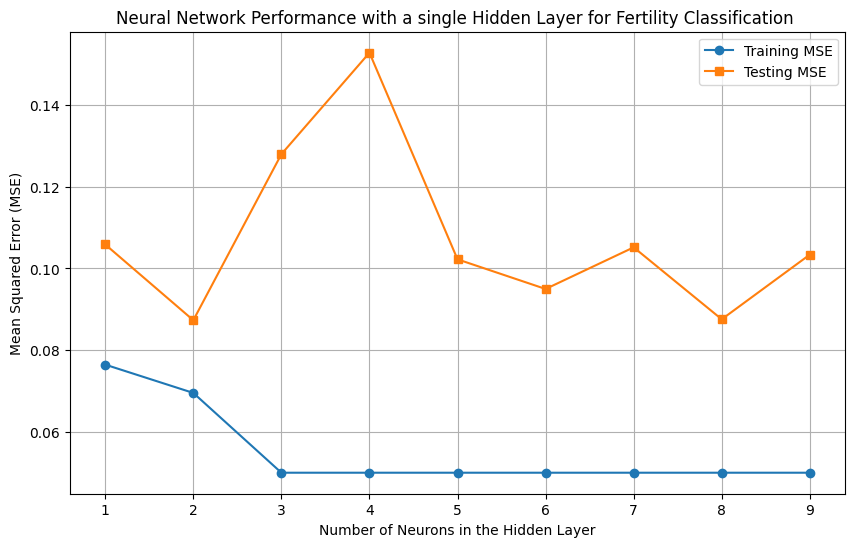

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), training_errors, label='Training MSE', marker='o')
plt.plot(range(1, 10), testing_errors, label='Testing MSE', marker='s')
plt.xlabel('Number of Neurons in the Hidden Layer')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Neural Network Performance with a single Hidden Layer for Fertility Classification ')
plt.legend()
plt.grid(True)
plt.show()

# **REPORT**
1. What happens if all the weights are initialized to zero (zero initialization)?
  
  Ans. If all weights are initialized to zero, every neuron in a layer will compute the same output and gradients during backpropagation. This leads to symmetry where all neurons learn the same features, defeating the purpose of having multiple neurons. As a result, the network fails to learn effectively. Hence, random initialization is essential for breaking symmetry.

2. What is the difference between epoch, batch, and iteration in neural
networks?

  Ans. Difference between epcoh, batch and iteration in neural networks is:
  
  Epoch: One complete pass through the entire training dataset.

  Batch: A subset of the training data used for one forward/backward pass.

  Iteration: A single update of the model parameters.

3. What is the key difference between stochastic gradient decent and batch gradient decent?  

  Ans. The key difference between stochastic gradient descent and batch gradient descent is:

  Stochastic Gradient Descent (SGD) updates weights using one training example at a time. It introduces noise but allows quicker convergence and escape from local minima.

  Batch Gradient Descent uses the entire dataset to compute gradients before each update. It's stable but computationally expensive for large datasets.

4. What problems does a completely random initialization of a neural network lead to?

  Ans. Completely random initialization of a neural network lead to the problems of:
i) Vanishing Gradients- sigmoid outputs close to 0 or 1, hence gradients near 0
ii) Exploding Gradients- activations/gradients become too large

5. Name any ten hyperparameters in a multi-layer neural network.

  Ans. Ten hyperparameters in a multi-layer neural network are:

  i) Number of hidden layers

  ii) Number of neurons per layer

  iii) Batch size

  iv) Number of epochs

  v) Weight initialization method

  vi) Activation function

  vii) Dropout rate

  viii) Optimizer like SGD, Adam

  ix) Regularization parameters like L1, L2

  x) Learning rate